### 💾💻📊 Data Science - MMI Portfolio No. 1 
# 💥 Superhero analysis 💥

## Main goal: Use the provided datasets to answer the following questions
1. How is the male-to-female ratio of superheros (marvel + DC) and how does it change over time?
2. How does this compare between Marvel and DC superheros?
3. How does the look (hair color, eyes ...) change over time?
4. Is there a typical look of a bad superhero and of a good superhero?

## General instructions
- The final notebook should be executable in the correct order (this means it should work if you do `Kernel` --> `Restart kernel and run all cells...`)
- Just providing code and plots is not enough, you should document and comment where necessary. Not so much on small code-related things (you may still do this if you want though, but this is not required), but mostly to explain what you do, why you do it, what you observe.

More specifically:
- Please briefly comment on the changes you do to the data, in particular, if you apply complex operations or if your changes depend on a certain choice you have to make.
- Please add descriptions and/or interpretations to the results you generate (for instance tables, plots). This doesn't have to be a lot of text. For simple, easy-to-understand results, a brief sentence can be enough. For more complex results, you might want to add a bit more explanation.

---
Please add your Name here
## Name: Kevin Zielke

---

## Imports and helper function
Use this part to import the main libraries used in this notebook.  
Also add more complex helper functions to this part (if you use any).

In [1]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# add imports if anything is missing
# for instance. feel free to use other plotting libraries (e.g. seaborn, plotly...)

## Data import
Simple: Use this part to import your data.
For the present case you can simply use Pandas `.read_json()`.

In [2]:
path = os.getcwd()  # add your own relative or absolute path, or use os.getcwd() for the current path

file_marvel = os.path.join(path, "superhero_data_marvel_mmi2024.json")
file_dc = os.path.join(path, "superhero_data_dc_mmi2024.json")

In [3]:
marvel_data = pd.read_json(file_marvel)
dc_data = pd.read_json(file_dc)
marvel_data.head()

,align,alive,appearances,eye,first appearance,gsm,hair,id,name,page_id,sex,urlslug
0,good characters,living characters,4043.0,hazel eyes,aug-62,None,brown hair,secret identity,spider-man (peter parker),1678,male characters,\/spider-man_(peter_parker)
1,good characters,living characters,3360.0,blue eyes,mar-41,None,white hair,public identity,captain america (steven rogers),7139,male characters,\/captain_america_(steven_rogers)
2,neutral characters,living characters,3061.0,blue eyes,oct-74,None,black hair,public identity,"wolverine (james \""logan\"" howlett)",64786,male characters,\/wolverine_(james_%22logan%22_howlett)
3,good characters,living characters,2961.0,blue eyes,mar-63,None,black hair,public identity,"iron man (anthony \""tony\"" stark)",1868,male characters,\/iron_man_(anthony_%22tony%22_stark)
4,good characters,living characters,2258.0,blue eyes,nov-50,None,blond hair,no dual identity,thor (thor odinson),2460,male characters,\/thor_(thor_odinson)


In [4]:
dc_data.head()

,align,alive,appearances,eye,first appearance,gsm,hair,id,name,page_id,sex,urlslug
0,good characters,living characters,3093.0,blue eyes,"1939, may",None,black hair,secret identity,batman (bruce wayne),1422,male characters,\/wiki\/batman_(bruce_wayne)
1,good characters,living characters,2496.0,blue eyes,"1986, october",None,black hair,secret identity,superman (clark kent),23387,male characters,\/wiki\/superman_(clark_kent)
2,good characters,living characters,1565.0,brown eyes,"1959, october",None,brown hair,secret identity,green lantern (hal jordan),1458,male characters,\/wiki\/green_lantern_(hal_jordan)
3,good characters,living characters,1316.0,brown eyes,"1987, february",None,white hair,public identity,james gordon (new earth),1659,male characters,\/wiki\/james_gordon_(new_earth)
4,good characters,living characters,1237.0,blue eyes,"1940, april",None,black hair,secret identity,richard grayson (new earth),1576,male characters,\/wiki\/richard_grayson_(new_earth)


<span style="color:yellow">
I loaded the data of dc and marvel superheros into their own dataframe and used the head() function to get a quick overview of the columns and the content of both dataframes. The columns are exactly the same and the content looks like it has the same variable types, which is good for the further analysis.
</span>.

## First Exploration & Data Cleaning
Use this part to have a first look at the data.  
Apply the necessary operations to clean and harmonize the data, such as handling missing values, conversions etc.

### Exercise 1: First overview
Here, you don't have to perform any changes. Just briefly comment on the following:
- What are missing values here and are they a problem for the task?
<span style="color:yellow">
    - It looks like every column has at least some null entries except *name*, *page_id* and *urlslug* (but these features are actually not needed in any of the tasks). This means we have to deal with some null values in each task, which will reduce the avaiable data for the tasks. But we should not just drop every null entry. It could be that an entry has a null value for e.g. *sex* and is therefore uninteresting for task 4, but it might still have a non-value for *align* and can be used in task 4.  
    Especially *gsm* with only 154 entries in both dataframes is strongly under represented. Inspecting the *gsm* column further with the value_counts() method reveals that it contains the sexual identity of the characters. Another google search reveals that *gsm* stands for gender and sexual minorities. Since the exercise is not interested in this information, this is not a problem.
    - __Useful features:__ 
        - 1+2.: sex, first appearance
        - 3.: eye, hair, first appearance
        - 4.: eye, hair, align
    - __Features that are not needed:__
        - alive, appearances, gsm, id, name, page_id, urlslug
</span>.
- Are there features in the datasets that require changes to be useful for a later analysis?
<span style="color:yellow">
    - __first appearance__: has different date encodings in the two dataframes. These need to be harmonised and encoded as date instead of strings.
    - __hair__: In the marvel dataframe, there are hair values for *bald*, *no hair* and some *null* values. In the DC dataframe there is no value for *bald* or *no hair*. Checking the entry for *Lex Luthor* (who is bald) reveals that this popular character is somehow missing. But *Bizarro Lex Luthor* (who is also bald), shows us that the value for hair is just *None*. This means, that we can't be sure if the values for hair are missing, or if the character is bald. But there are a lot of bald marvel characters, so it would not be wise to just drop all bald characters. We just have to keep in mind, that a lot of bald characters are not even counted. Also we can change the *no hair* values to *bald*, without loosing any information.
    - __align__: The values are *good*, *bad*, *neutral* and *reformed criminal*. This can be encoded as an integer variable, where good=1, neutral=0 and bad=-1. Reformed criminals will be treated as good. This has the nice side effect, that we can just sum up all the alignments of multiple superheros and see if they lean towards good or bad. Null values will be treated as 0.
    - __sex__: This can be used for the sex too. Here we have values for female, male, genderless, transgender, agender and genderfluid characters. Female will be treated as 1, male as -1 and the rest including null values as 0. The transgender characters are sadly missing the information, if they are seen as female or male.
    - __alive__: The only values are *living characters* and *deceased characters*. This can be encoded as boolean values, which can be better used in statistical methods. But this might turn null values to false, which is not correct. So we will use integer values where alive=1 and deceased=-1. Null will be 0.
</span>.

In [5]:
print(dc_data.info())
print(marvel_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6896 entries, 0 to 6895
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   align             6295 non-null   object 
 1   alive             6893 non-null   object 
 2   appearances       6541 non-null   float64
 3   eye               3268 non-null   object 
 4   first appearance  6827 non-null   object 
 5   gsm               64 non-null     object 
 6   hair              4622 non-null   object 
 7   id                4883 non-null   object 
 8   name              6896 non-null   object 
 9   page_id           6896 non-null   int64  
 10  sex               6771 non-null   object 
 11  urlslug           6896 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 700.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16376 entries, 0 to 16375
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ----

In [6]:
print(dc_data["align"].value_counts())
print(marvel_data["align"].value_counts())

bad characters        2895
good characters       2832
neutral characters     565
reformed criminals       3
Name: align, dtype: int64
bad characters        6720
good characters       4636
neutral characters    2208
Name: align, dtype: int64


In [7]:
print(dc_data.alive.value_counts())
print(marvel_data.alive.value_counts())

living characters      5200
deceased characters    1693
Name: alive, dtype: int64
living characters      12608
deceased characters     3765
Name: alive, dtype: int64


In [8]:
print(dc_data.hair.value_counts())
print(marvel_data.hair.value_counts())
dc_data[dc_data.name.str.contains("luthor")] # check for bald characters

black hair               1574
brown hair               1148
blond hair                744
red hair                  461
white hair                346
grey hair                 157
green hair                 42
blue hair                  41
purple hair                32
strawberry blond hair      28
orange hair                21
pink hair                  11
gold hair                   5
violet hair                 4
silver hair                 3
reddish brown hair          3
platinum blond hair         2
Name: hair, dtype: int64
black hair               3755
brown hair               2339
blond hair               1582
no hair                  1176
bald                      838
white hair                754
red hair                  620
grey hair                 531
green hair                117
auburn hair                78
blue hair                  56
strawberry blond hair      47
purple hair                47
orange hair                43
variable hair              32
pink hair      

,align,alive,appearances,eye,first appearance,gsm,hair,id,name,page_id,sex,urlslug
19,bad characters,living characters,677.0,green eyes,"1986, october",None,None,public identity,alexander luthor (new earth),1480,male characters,\/wiki\/alexander_luthor_(new_earth)
1036,neutral characters,living characters,26.0,None,"1998, january",None,None,public identity,lena luthor ii (new earth),157281,female characters,\/wiki\/lena_luthor_ii_(new_earth)
1618,good characters,living characters,15.0,blue eyes,"2009, october",None,blond hair,public identity,lori luthor (new earth),175316,female characters,\/wiki\/lori_luthor_(new_earth)
2624,None,living characters,8.0,green eyes,"2007, september",None,brown hair,public identity,lionel luthor (new earth),33108,male characters,\/wiki\/lionel_luthor_(new_earth)
3881,None,living characters,4.0,None,"2009, november",None,None,public identity,lena luthor i (new earth),157285,female characters,\/wiki\/lena_luthor_i_(new_earth)
3922,bad characters,living characters,4.0,black eyes,"2007, november",None,None,secret identity,bizarro lex luthor (new earth),32815,male characters,\/wiki\/bizarro_lex_luthor_(new_earth)


In [9]:
print(dc_data.gsm.value_counts())
print(marvel_data.gsm.value_counts())

homosexual characters    54
bisexual characters      10
Name: gsm, dtype: int64
homosexual characters     66
bisexual characters       19
transgender characters     2
transvestites              1
pansexual characters       1
genderfluid characters     1
Name: gsm, dtype: int64


In [10]:
print(dc_data.sex.value_counts())
print(marvel_data.sex.value_counts())

male characters           4783
female characters         1967
genderless characters       20
transgender characters       1
Name: sex, dtype: int64
male characters           11638
female characters          3837
agender characters           45
genderfluid characters        2
Name: sex, dtype: int64


In [11]:
dc_data.describe()

,appearances,page_id
count,6541.000000,6896.000000
mean,23.625134,147441.209252
std,87.378509,108388.631149
min,1.000000,1380.000000
25%,2.000000,44105.500000
50%,6.000000,141267.000000
75%,15.000000,213203.000000
max,3093.000000,404010.000000


In [12]:
marvel_data.describe()

,appearances,page_id
count,15280.000000,16376.000000
mean,17.033377,300232.082377
std,96.372959,253460.403399
min,1.000000,1025.000000
25%,1.000000,28309.500000
50%,3.000000,282578.000000
75%,8.000000,509077.000000
max,4043.000000,755278.000000


### Exercise 2: Handle missing values

If you think this is necessary for the next steps in your analysis, use this part to remove (or impute/replace/edit) missing values.  
<span style="color:yellow">
I like to keep all data, as long as it is negligible for performance. Some features I deemed uninteresting at first, may turn out to be interesting when exploring the data more. There are always options, not to show them, if they clutter the screen.    
But I will turn all *bald* and *no hair* values in *hair* to None, as I described before.
</span>

In [13]:
bald_mask = (marvel_data.hair == "bald") | (marvel_data.hair == "no hair")
marvel_data.loc[bald_mask, 'hair'] = 'bald'
print(marvel_data.hair.value_counts())

black hair               3755
brown hair               2339
bald                     2014
blond hair               1582
white hair                754
red hair                  620
grey hair                 531
green hair                117
auburn hair                78
blue hair                  56
purple hair                47
strawberry blond hair      47
orange hair                43
variable hair              32
pink hair                  31
yellow hair                20
silver hair                16
gold hair                   8
reddish blond hair          6
light brown hair            6
magenta hair                5
orange-brown hair           3
bronze hair                 1
dyed hair                   1
Name: hair, dtype: int64


## Exercise 3: Data conversions
Several columns contain data in a non-ideal format or style.
Apply the following changes:

- `first appearance` --> convert to consistent date format
- add column with only the year of appearance (call the new column: `year`)
- Convert the `name` column into a better, more consistent format. Try to add a proper `superhero_name` and a `real_name` column. So: `"batman (bruce wayne)"` should be split into `"batman"` and `"bruce wayne"`. Don't worry if this won't work for all cases, you are not expected to do (and check) this manually. Simply try to find a good solution that works most of the time.

### Hint:
Sometimes there is no proper Pandas function to do what you need (or we simply are not sure or can't find the right one...).
If you want to do a more complex operation on all entries in a column you can work with the `.apply()` method from Pandas. This fill any given Python function to all elements in a dataframe or column.

```python
def my_special_operation(input_entry):
    # do what you want
    return ouput_entry

# Apply this to ALL entries
my_dataframe.apply(my_special_operation)


# Apply this to all entries in one column
my_dataframe.loc[:, "column_A"].apply(my_special_operation)
```

<span style="color:yellow">
For the first appearance column I wrote a function for each dataframe, since the values were so different in the two. Marvel only had 2 digits and would turn the year 62 to 2062, which is obviously wrong. So I first split the string into year and month, parsed the year to an integer and added 1900 if the number was bigger than 24. Since the first appearance can't be in the future. Otherwise I added 2000.  
The DC dataframe had proper 4 digit years, that pandas can pasrse properly. But some months had holiday as the value, which could mean anything. I parsed the month to a list of months and printet out the weird values that didn't fit that list to see if there are any other weird values. But holiday was the only one. For these only the year is writen to first appearance.
</span>

In [14]:
marvel_data

,align,alive,appearances,eye,first appearance,gsm,hair,id,name,page_id,sex,urlslug
0,good characters,living characters,4043.0,hazel eyes,aug-62,None,brown hair,secret identity,spider-man (peter parker),1678,male characters,\/spider-man_(peter_parker)
1,good characters,living characters,3360.0,blue eyes,mar-41,None,white hair,public identity,captain america (steven rogers),7139,male characters,\/captain_america_(steven_rogers)
2,neutral characters,living characters,3061.0,blue eyes,oct-74,None,black hair,public identity,"wolverine (james \""logan\"" howlett)",64786,male characters,\/wolverine_(james_%22logan%22_howlett)
3,good characters,living characters,2961.0,blue eyes,mar-63,None,black hair,public identity,"iron man (anthony \""tony\"" stark)",1868,male characters,\/iron_man_(anthony_%22tony%22_stark)
4,good characters,living characters,2258.0,blue eyes,nov-50,None,blond hair,no dual identity,thor (thor odinson),2460,male characters,\/thor_(thor_odinson)
...,...,...,...,...,...,...,...,...,...,...,...,...
16371,bad characters,living characters,NaN,green eyes,None,None,bald,no dual identity,ru'ach (earth-616),657508,male characters,\/ru%27ach_(earth-616)
16372,good characters,living characters,NaN,blue eyes,None,None,bald,no dual identity,thane (thanos' son) (earth-616),665474,male characters,\/thane_(thanos%27_son)_(earth-616)
16373,bad characters,living characters,NaN,black eyes,None,None,bald,secret identity,tinkerer (skrull) (earth-616),695217,male characters,\/tinkerer_(skrull)_(earth-616)
16374,neutral characters,living characters,NaN,None,None,None,None,secret identity,tk421 (spiderling) (earth-616),708811,male characters,\/tk421_(spiderling)_(earth-616)


In [15]:
def marvel_to_datetime(input : str):
    if input is None:
        return None
    
    month, year_string = input.split("-")
    year = int(year_string)
    if(year > 24):
        year = 1900+year
    else:
        year = 2000+year

    return pd.to_datetime(month + str(year))

def dc_to_datime(input : str):
    if input is None:
        return None
    
    if ", " in input:
        year, month = input.split(", ")
        months = ["january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december"]

        if(not any(x in month for x in months)):
            print(input)
            return pd.to_datetime(year)
    
    return pd.to_datetime(input)

marvel_data["first appearance"] = marvel_data["first appearance"].apply(marvel_to_datetime)
dc_data["first appearance"] = dc_data["first appearance"].apply(dc_to_datime)

1988, holiday
1988, holiday


<span style="color:yellow">
The data is now harmonized between the two dataframes. We can now merge the two dataframes and add a column for the publisher. That way we dont have to write the following conversions twice.
</span>

In [16]:
marvel_data["publisher"] = "marvel"
dc_data["publisher"] = "dc"

data = pd.concat([marvel_data, dc_data], ignore_index=True)

<span style="color:yellow">
I encoded the year as int instead of float and set it to -1 where the values are missing. I think this way i will have an easier time plotting things based on the year later on.
</span>

In [17]:
def extract_year(input : np.datetime64):
    if pd.isna(input.year):
        return int(-1)
    
    return int(input.year)

data["year"] = data["first appearance"].apply(extract_year)

<span style="color:yellow">
The apply function didn't work out for me here. I wrote a function that worked just fine on a single entry, but when I tried to apply it to the whole column, it didn't work.  
I went with the str.extract() function from pandas, and asked copilot to help me with the regex. It worked out just fine.
</span>

In [18]:
import pandas as pd

data['hero_name'] = data['name'].str.extract(r'([^\(]*)')
data['real_name'] = data['name'].str.extract(r'\((.*?)\)')

<span style="color:yellow">
The only values for _alive_ are *living characters* and *deceased characters*. This can be encoded as boolean values, which can be better used in statistical methods
</span>.

In [19]:
data.alive = data.alive.map({'living characters': 1, 'deceased characters': -1})
data.alive = data.alive.fillna(0)
data.alive = data.alive.astype(int)

<span style="color:yellow">
The values are *good*, *bad*, *neutral* and *reformed criminal*. This can be encoded as an integer variable, where good=1, neutral=0 and bad=-1. Reformed criminals will be treated as good.
</span>.

In [20]:
data['align'] = data['align'].map({'good characters': 1, 'neutral characters': 0, 'bad characters': -1, 'reformed criminals': 1})
data['align'] = data['align'].fillna(0)
data['align'] = data['align'].astype(int)

In [21]:
data.sex = data.sex.map({'female characters': 1, 'male characters': -1, 'genderless characters': 0, 'transgender characters': 0, 'agender characters': 0, 'genderfluid characters': 0})
data.sex = data.sex.fillna(0)
data.sex = data.sex.astype(int)

<span style="color:yellow">
Some of the values for the eyes don't describe the color of the eyes but some properties of the eyes. Still they kinda describe the eyes so we leave them. There is the value 'auburn hair' which is possibly some error, unless there is a character with hairy eyes. Looking at the entries we see that these are missing their eye color. Researching the caracters reveals that they actually have auburn hair, so we will just fix these entries manually.
</span>

In [22]:
data.eye.value_counts().keys()

Index(['blue eyes', 'brown eyes', 'black eyes', 'green eyes', 'red eyes',
       'white eyes', 'yellow eyes', 'grey eyes', 'hazel eyes', 'variable eyes',
       'photocellular eyes', 'purple eyes', 'orange eyes', 'pink eyes',
       'violet eyes', 'gold eyes', 'one eye', 'amber eyes', 'silver eyes',
       'multiple eyes', 'no eyes', 'auburn hair', 'yellow eyeballs',
       'black eyeballs', 'magenta eyes', 'compound eyes'],
      dtype='object')

In [23]:
data[data.eye == 'auburn hair']

,align,alive,appearances,eye,first appearance,gsm,hair,id,name,page_id,sex,urlslug,publisher,year,hero_name,real_name
17248,1,1,32.0,auburn hair,1984-04-01,None,None,public identity,marcia king (new earth),80676,1,\/wiki\/marcia_king_(new_earth),dc,1984,marcia king,new earth
18152,0,1,14.0,auburn hair,1989-04-01,None,None,public identity,"anthony angelo, jr. (new earth)",146812,-1,"\/wiki\/anthony_angelo,_jr._(new_earth)",dc,1989,"anthony angelo, jr.",new earth
19976,1,1,5.0,auburn hair,1998-04-01,None,None,None,tawna (new earth),114487,1,\/wiki\/tawna_(new_earth),dc,1998,tawna,new earth
19999,-1,1,5.0,auburn hair,1995-08-01,None,None,secret identity,razerkut (new earth),192614,1,\/wiki\/razerkut_(new_earth),dc,1995,razerkut,new earth
20003,-1,1,5.0,auburn hair,1994-11-01,None,None,public identity,carla draper (new earth),130938,1,\/wiki\/carla_draper_(new_earth),dc,1994,carla draper,new earth
20446,0,-1,4.0,auburn hair,1995-04-01,None,None,None,madolyn corbett (new earth),71092,1,\/wiki\/madolyn_corbett_(new_earth),dc,1995,madolyn corbett,new earth
21722,0,1,2.0,auburn hair,1988-01-01,None,None,public identity,sally milton (new earth),4935,1,\/wiki\/sally_milton_(new_earth),dc,1988,sally milton,new earth


In [24]:
# remove eye values, that dont describe eye colors
data[data.eye == 'auburn hair'].hair = 'auburn hair'
data.eye = data.eye.replace('auburn hair', None)

C:\Users\kevin\AppData\Local\Temp\ipykernel_18520\3287460868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data.eye == 'auburn hair'].hair = 'auburn hair'


In [26]:
data.head()

,align,alive,appearances,eye,first appearance,gsm,hair,id,name,page_id,sex,urlslug,publisher,year,hero_name,real_name
0,1,1,4043.0,hazel eyes,1962-08-01,None,brown hair,secret identity,spider-man (peter parker),1678,-1,\/spider-man_(peter_parker),marvel,1962,spider-man,peter parker
1,1,1,3360.0,blue eyes,1941-03-01,None,white hair,public identity,captain america (steven rogers),7139,-1,\/captain_america_(steven_rogers),marvel,1941,captain america,steven rogers
2,0,1,3061.0,blue eyes,1974-10-01,None,black hair,public identity,"wolverine (james \""logan\"" howlett)",64786,-1,\/wolverine_(james_%22logan%22_howlett),marvel,1974,wolverine,"james \""logan\"" howlett"
3,1,1,2961.0,blue eyes,1963-03-01,None,black hair,public identity,"iron man (anthony \""tony\"" stark)",1868,-1,\/iron_man_(anthony_%22tony%22_stark),marvel,1963,iron man,"anthony \""tony\"" stark"
4,1,1,2258.0,blue eyes,1950-11-01,None,blond hair,no dual identity,thor (thor odinson),2460,-1,\/thor_(thor_odinson),marvel,1950,thor,thor odinson


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23272 entries, 0 to 23271
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   align             23272 non-null  int32         
 1   alive             23272 non-null  int32         
 2   appearances       21821 non-null  float64       
 3   eye               9870 non-null   object        
 4   first appearance  22388 non-null  datetime64[ns]
 5   gsm               154 non-null    object        
 6   hair              16734 non-null  object        
 7   id                17489 non-null  object        
 8   name              23272 non-null  object        
 9   page_id           23272 non-null  int64         
 10  sex               23272 non-null  int32         
 11  urlslug           23272 non-null  object        
 12  publisher         23272 non-null  object        
 13  year              23272 non-null  int64         
 14  hero_name         2327

<span style="color:yellow">
Everything is beautiful now
</span>.

## Data analysis 1 
Here you should address the two main questions posed at the beginning:
1. How is the male-to-female ratio of superheros (marvel + DC) and how does it change over time?
2. How does this compare between Marvel and DC superheros?

### Exercise 4:
- Please show the appearance of new superheros over time.
- Compare the same for only "male" and "female" superheros. 
- Perform this analysis for `Marvel`, `DC` and both `Marvel_DC`.

Hints: 
- For such a comparison it is often helpful to plot the **ratio** between the two (male:female or female:male).
- When you are interested in trends over time, you are often free to decide how you handle the "time"-component. You can use data for every year, or combine several years etc.
- Optional "nice-to-have": for noisy temporal data it sometimes helps (visually) to also use a **moving average** to smoothen curves.

In [28]:
# male to female ratio overall
male_mask = data.sex == -1
female_mask = data.sex == 1
len(data[male_mask]) / len(data[female_mask])

2.8292556857339766

In [29]:
dc_mask = data.publisher == "dc"
marvel_mask = data.publisher == "marvel"

print("DC: ", len(data[male_mask & dc_mask]) / len(data[female_mask & dc_mask]))
print("Marvel", len(data[male_mask & marvel_mask]) / len(data[female_mask & marvel_mask]))

DC:  2.431621759023894
Marvel 3.0330987750847016


<span style="color:yellow">
We can see that the overall male-to-female ratio is 2.61, which means that for every female superhero there are 2.61 male superheroes. The ratio for DC is slightly lower with 2.43, while Marvel has a ratio of 2.7.  

In [30]:
def create_ratio_per_year_dataframe(additional_mask=True):
    ratios_per_year = pd.DataFrame(columns=["year", "male-to-female ratio", "female_count", "male_count", "total_count"])

    for year in range(data.year[data.year > 0].min(), data.year[data.year > 0].max()+1):
        year_mask = data.year == year   # only difference to create_ratio_over_time_dataframe is the == instead of <=

        female_count = len(data[year_mask & female_mask & additional_mask])
        male_count = len(data[year_mask & male_mask & additional_mask])
        
        if (female_count == 0):
            ratio = male_count
        else:
            ratio = male_count / female_count
        
        ratios_per_year.loc[len(ratios_per_year)] = [year, ratio, female_count, male_count, female_count+male_count]
    
    return ratios_per_year

def create_ratio_over_time_dataframe(additional_mask=True):
    ratios_per_year = pd.DataFrame(columns=["year", "male-to-female ratio", "female_count", "male_count", "total_count"])

    for year in range(data.year[data.year > 0].min(), data.year[data.year > 0].max()+1):
        year_mask = data.year <= year   # only difference to create_ratio_per_year_dataframe is the <= instead of ==

        female_count = len(data[year_mask & female_mask & additional_mask])
        male_count = len(data[year_mask & male_mask & additional_mask])
        
        if (female_count == 0):
            ratio = male_count
        else:
            ratio = male_count / female_count
        
        ratios_per_year.loc[len(ratios_per_year)] = [year, ratio, female_count, male_count, female_count+male_count]
    
    return ratios_per_year

In [31]:
def line_plot_with_movin_average(data, x, y):
    data['ratio_moving_avg'] = data[y].rolling(window=5).mean()
    data.plot(x=x, y=y, kind="line")
    plt.plot(data[x], data['ratio_moving_avg'], label='Moving Average')
    plt.legend()
    plt.show()

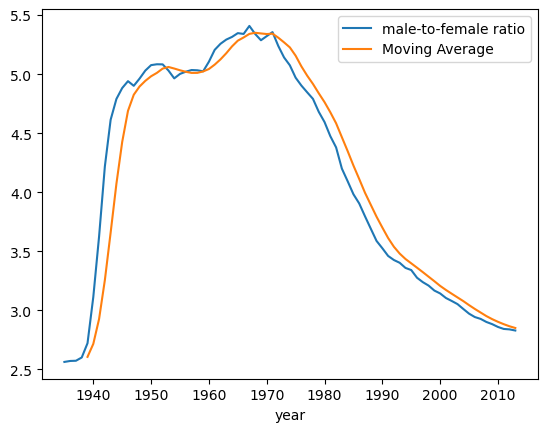

In [32]:
ratios_over_time = create_ratio_over_time_dataframe()
line_plot_with_movin_average(ratios_over_time, "year", "male-to-female ratio")

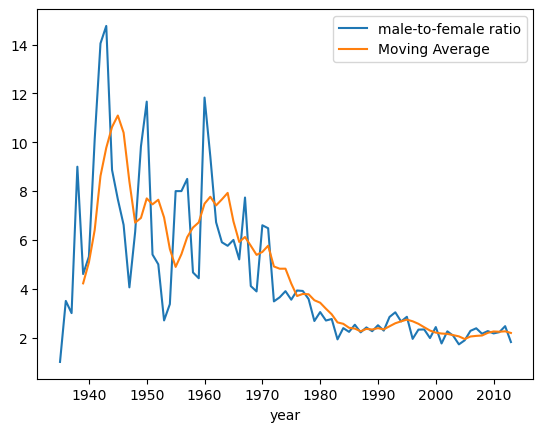

In [33]:
ratios_per_year = create_ratio_per_year_dataframe()
line_plot_with_movin_average(ratios_per_year, "year", "male-to-female ratio")

<Axes: title={'center': 'new superheros per year'}, xlabel='year'>

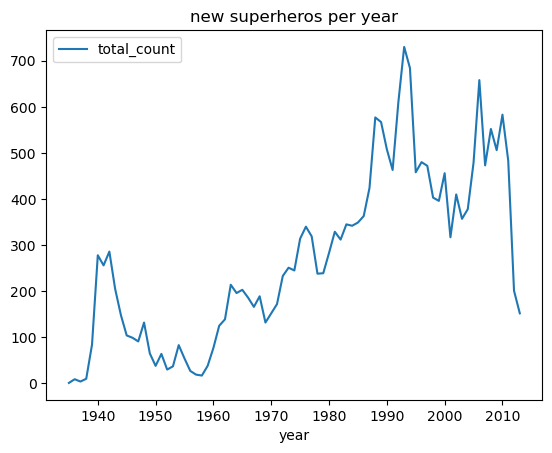

In [34]:
ratios_per_year.plot(x="year", y="total_count", kind="line", title="new superheros per year")

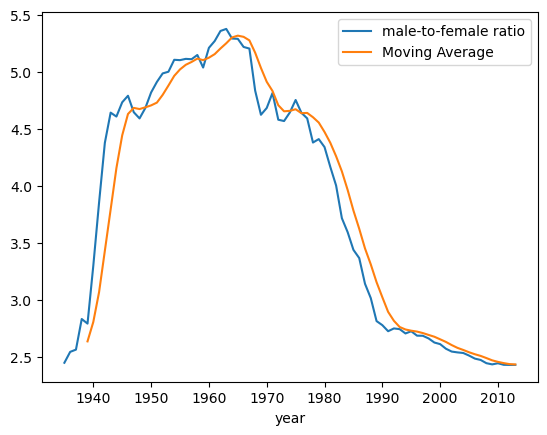

In [35]:
dc_ratios_over_time = create_ratio_over_time_dataframe(dc_mask)
line_plot_with_movin_average(dc_ratios_over_time, "year", "male-to-female ratio")

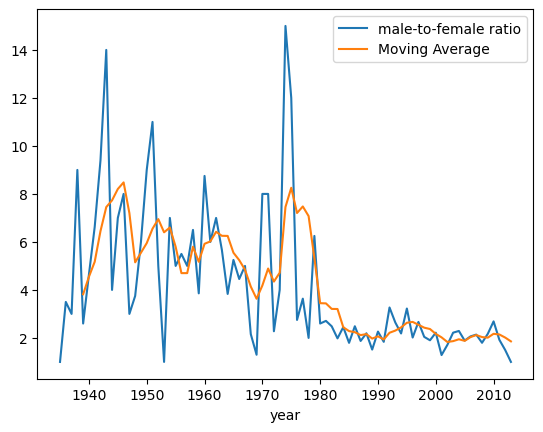

In [36]:
dc_ratios_per_year = create_ratio_per_year_dataframe(dc_mask)
line_plot_with_movin_average(dc_ratios_per_year, "year", "male-to-female ratio")

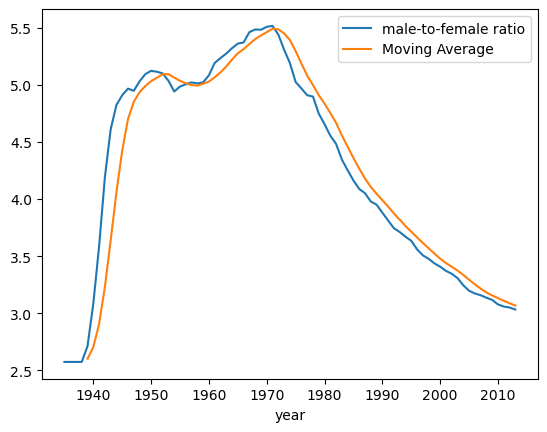

In [37]:
marvel_ratios_over_time = create_ratio_over_time_dataframe(marvel_mask)
line_plot_with_movin_average(marvel_ratios_over_time, "year", "male-to-female ratio")

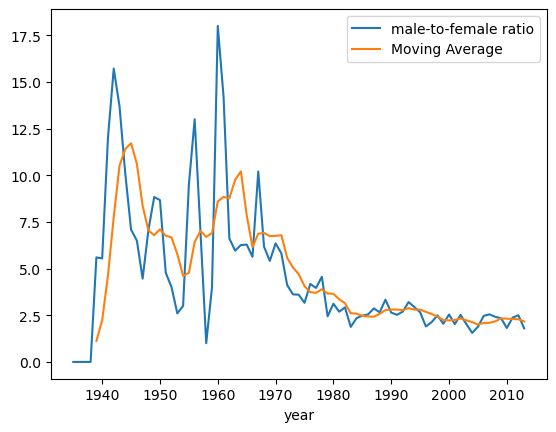

In [38]:
marvel_ratios_per_year = create_ratio_per_year_dataframe(marvel_mask)
line_plot_with_movin_average(marvel_ratios_per_year, "year", "male-to-female ratio")

<span style="color:yellow">
I decided to plot the male-to-female ratio overall over the years. This shows us that the male-to-female ratio of all characters was very high in the beginning, and started to fall very sharply from the 70s to the 90s. This is also when the publishers started to add significantly more characters per year. The data doesn't show us when characters were discontinued. Only if they are alive now. The appearances column also doesn't tell us, when these apearences were. So if some male characters were discontinued over the years, one could argue that the effective male-to-female ratio would sink in that year. If female characters were discontinued it would be vice cersa. But this is not visible in the data.
So I decided to plot the ratio for for each year. The year is taken from the first appearance of the superhero. So this shows us the ratio of *added* superheroes for each year, but not the ratio of all superheroes at that time.  
We can see that the ratio is heavily fluctuating up until the 70s, but then decreases during the 70s and stays around 3 since the 80s. The total number of characters added each year is increasing since the 60s. This can explain the heavy fluctuation in the beginning. Every single new character has a greater impact on the ratio, when there are only a few characters in total.  
This is also seen when comparing the DC and Marvel data. Because Marvel has more characters in total. But in general the ratios are following the overall trend for both publichers.

## Data analysis 2 
Here you should address the two main questions posed at the beginning:
3. How does the look (hair color, eyes ...) change over time?
4. Is there a typical look of a bad superhero and a good superhero?

### Exercise 5:
- Find suitable plots to show if/how superhero hair color and eye color changed over time.
- Answer question no. 4 using visualization as well as a correlation analysis.

In [39]:
def stacked_bar_plot_per_year(column, plot_colors):
    # Step 1: Create a new DataFrame where each column will be a hair category
    df = pd.DataFrame()

    # Step 2: For each year, count the occurrences of each eye category
    dfs = []
    for year in range(data.year[data.year > 0].min(), data.year[data.year > 0].max()+1):
        year_mask = (data.year == year) & (data.year > 0)
        year_data = data[year_mask]
        counts = year_data[column].value_counts() / year_data[column].dropna().shape[0]
        counts.name = year
        dfs.append(counts)

    # Concatenate the list of DataFrames
    df = pd.concat(dfs, axis=1, sort=True)

    # Transpose the DataFrame to have years on the y-axis
    df = df.T

    # Step 4: Plot the data with custom colors
    ax = df.plot(kind='bar', stacked=True, figsize=(15,7), color=[plot_colors[c] for c in df.columns],width=1)
    plt.xlabel(column + ' Color')
    plt.ylabel('Normalized Count')
    plt.title(column + ' colors of new superheros in each year (Normalized)')

    # Move legend outside the plot area
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()

def stacked_bar_plot_over_time(column, plot_colors):
    # Step 1: Create a new DataFrame where each column will be a hair category
    df = pd.DataFrame()

    # Step 2: For each year, count the occurrences of each eye category
    dfs = []
    for year in range(data.year[data.year > 0].min(), data.year[data.year > 0].max()+1):
        year_mask = (data.year <= year) & (data.year > 0)
        year_data = data[year_mask]
        counts = year_data[column].value_counts() / year_data[column].dropna().shape[0]
        counts.name = year
        dfs.append(counts)

    # Concatenate the list of DataFrames
    df = pd.concat(dfs, axis=1, sort=True)

    # Transpose the DataFrame to have years on the y-axis
    df = df.T

    # Step 4: Plot the data with custom colors
    ax = df.plot(kind='bar', stacked=True, figsize=(15,7), color=[plot_colors[c] for c in df.columns],width=1)
    plt.xlabel(column + ' Color')
    plt.ylabel('Normalized Count')
    plt.title(column + ' colors of new superheros in each year (Normalized)')

    # Move legend outside the plot area
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()

In [40]:
hair_colors = {
    'black hair': 'black',
    
    'brown hair': 'saddlebrown',
    'auburn hair': 'chocolate',
    'light brown hair': 'burlywood',
    'bronze hair': 'rosybrown',
    
    'blond hair': 'gold',
    'strawberry blond hair': 'lightsalmon',
    'yellow hair': 'yellow',
    'gold hair': 'gold',
    'platinum blond hair': 'lightgrey',
    'white hair': 'lightgrey',
    'grey hair': 'dimgray',
    'silver hair': 'silver',
    
    'red hair': 'firebrick',
    'orange hair': 'darkorange',
    'orange-brown hair': 'peru',
    'reddish brown hair': 'maroon',
    'reddish blond hair': 'sandybrown',
    
    'green hair': 'forestgreen',
    'blue hair': 'royalblue',
    'purple hair': 'darkviolet',
    'violet hair': 'violet',
    'pink hair': 'lightpink',
    'magenta hair': 'magenta',
    
    'bald': 'darkcyan',
    
    'variable hair': 'cyan',
    'dyed hair': 'cyan'
}

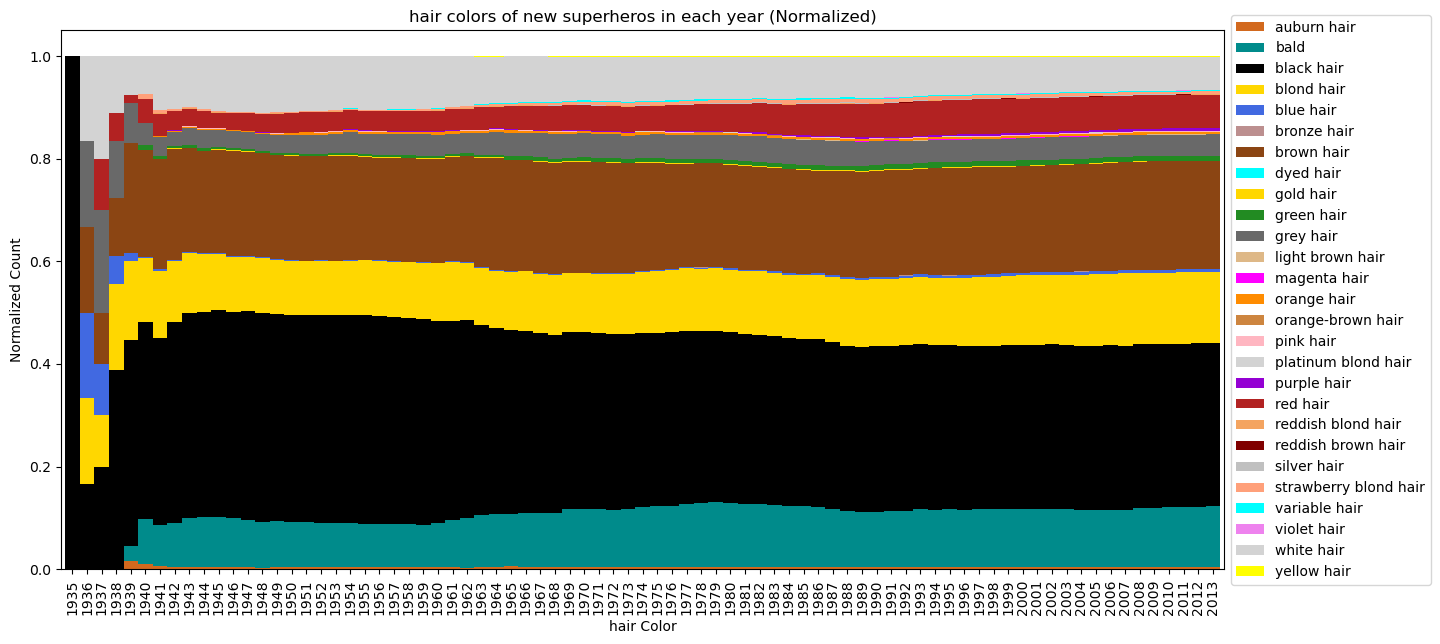

In [41]:
stacked_bar_plot_over_time("hair", hair_colors)

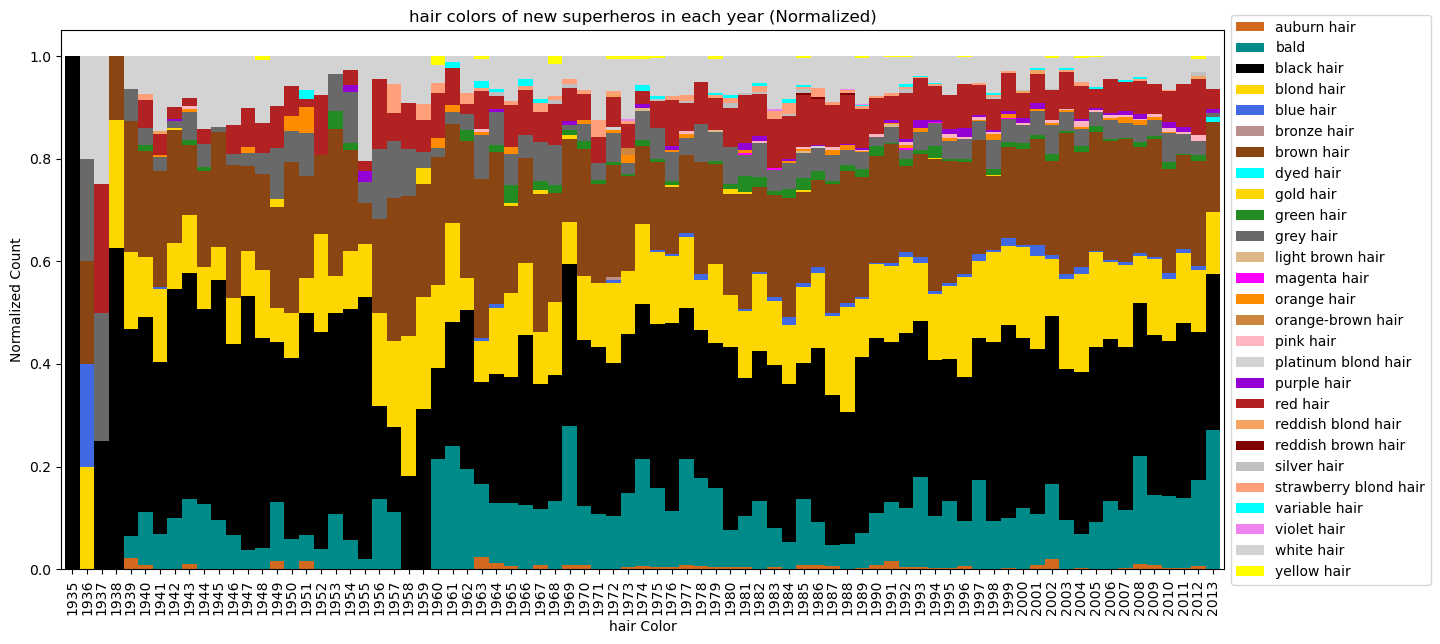

In [42]:
stacked_bar_plot_per_year("hair", hair_colors)

<span style="color:yellow">
I chose to show the distribution of the hair colors over time, since the total number of hair colors would just rise with the number over superheros added. I used a stacked bar plot for this and for better readibility plotted the bars in the colors of their hair.
We can see that there are lot moer black and white haired characters in the beginning. Maybe this is because the comics were black and white and the colors of discontinued characters during that time never were updated. After that the hair color distribution stays very much stable. Black and brown hair are the most common hair colors, followed by blond hair and bald characters. Red, white and grey hair make up a big part of the rest and the others are very rare. I also plotted the distribution of hair colors per year because I wanted to see if there was anything interesting and I only needed to change 1 character in the code. But there is nothing special to find here.

In [43]:
# table for fitting plot colors for eye colors
eye_colors = {
    'purple eyes': 'purple',    
    'violet eyes': 'violet',
    'pink eyes': 'lightpink',    
    'magenta eyes': 'magenta',
    
    'red eyes': 'firebrick',
    
    'orange eyes': 'darkorange',
    
    'amber eyes': 'darkgoldenrod',
    'brown eyes': 'saddlebrown',
    'hazel eyes': 'darkkhaki',
    
    'green eyes': 'limegreen',
    
    'blue eyes': 'dodgerblue',
    
    'black eyes': 'black',
    'black eyeballs': 'black',
    
    'white eyes': 'whitesmoke',
    'grey eyes': 'dimgray',
    'silver eyes': 'silver',
    
    'yellow eyes': 'gold',
    'yellow eyeballs': 'gold',
    'gold eyes': 'gold',    
    
    'compound eyes': 'cyan',
    #'auburn hair': 'saddlebrown',
    'multiple eyes': 'cyan',
    'one eye': 'cyan',
    'no eyes': 'cyan',
    'photocellular eyes': 'cyan',
    'variable eyes': 'cyan',
}

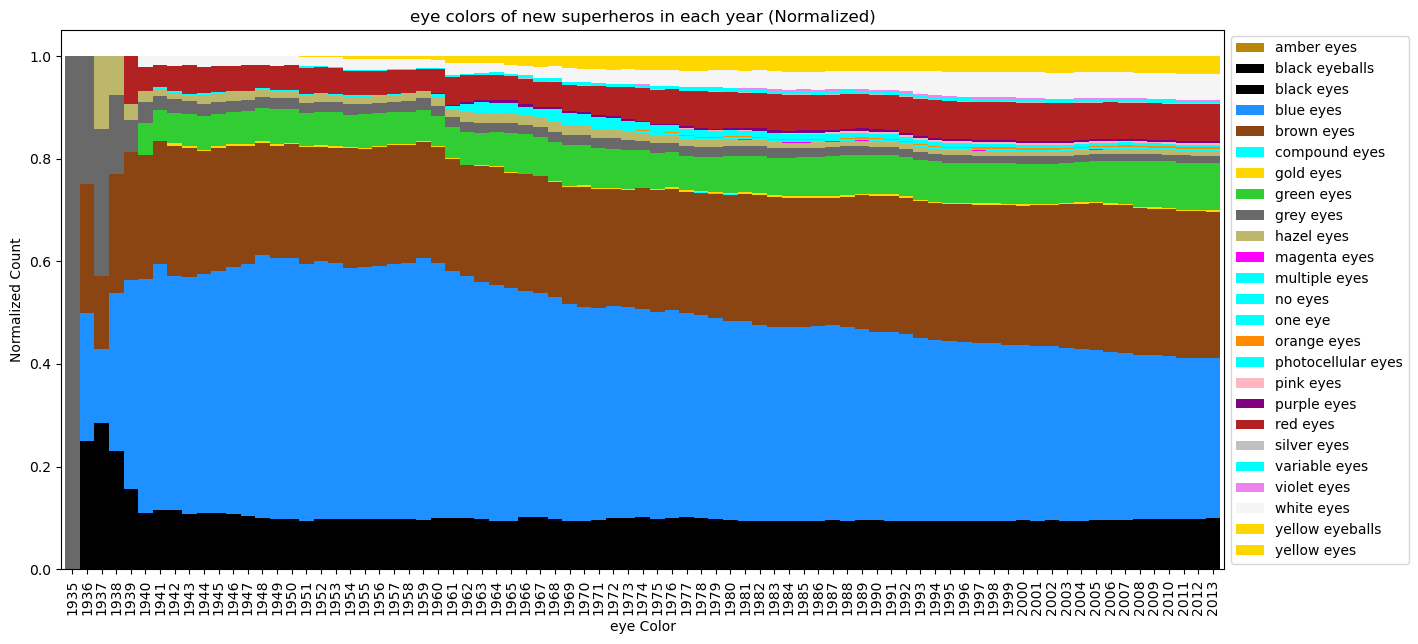

In [44]:
stacked_bar_plot_over_time("eye", eye_colors)

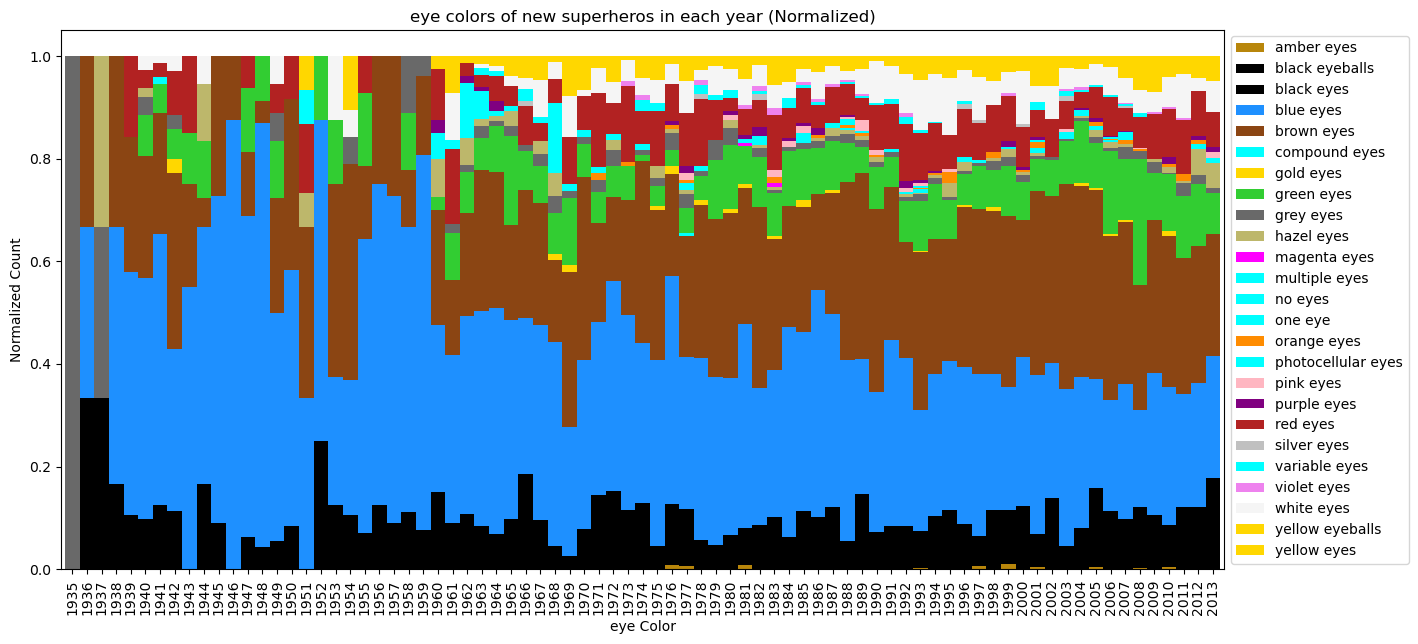

In [45]:
stacked_bar_plot_per_year("eye", eye_colors)

<span style="color:yellow">
For the eyes I chose the same visualtization strategy as for the hair. For all the descriptive eye properties I chose cyan, since they are pretty rare anyway.
We can see that blue eyes are the most popular eye color but their distribution is steadily falling since the 60s. In 2013 they were about as popular as brown eyes, which are the second most popular over all. Green, black and red eyes have about the same distribution, which is strange, since black and red eyes are not natural. Somehow yellow eyes appeared during the 50s and have something strong going on since then. Maybe some whacky characters taking over the multiverse.

# 4. Is there a typical look of a bad superhero and a good superhero?

<Axes: >

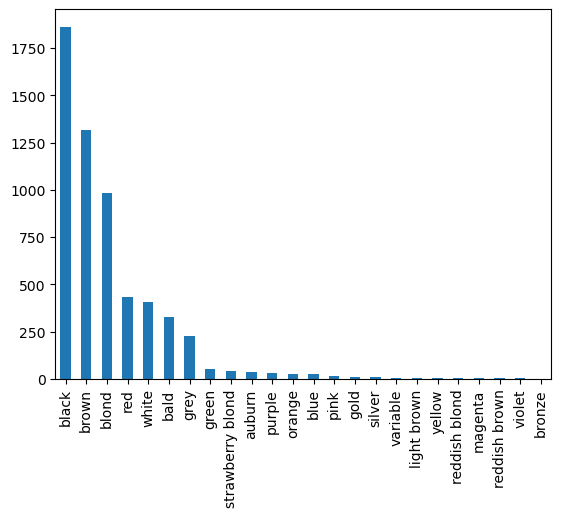

In [46]:
good_mask = data["align"] == 1
good_hair = data[good_mask].hair.str.replace(" hair", "")

good_hair = good_hair.dropna()

good_hair.value_counts().plot(kind="bar")

<span style="color:yellow">
For good characters we can see that black, brown, blond, red, white and bald are the most common hair colors just like we saw in the general distribution.

<Axes: >

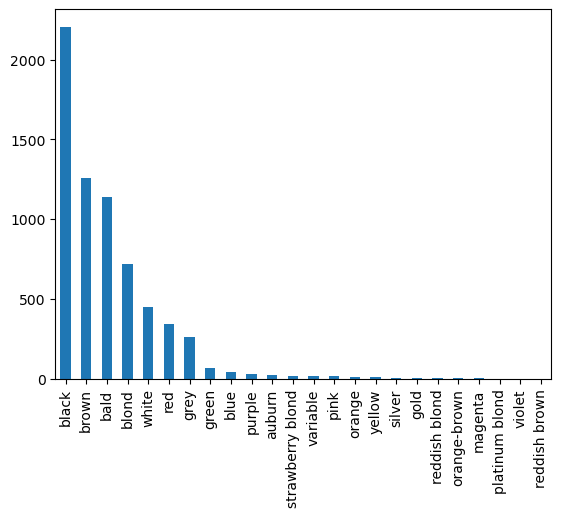

In [47]:
bad_mask = data["align"] == -1
bad_hair = data[bad_mask].hair.str.replace(" hair", "")

bad_hair = bad_hair.dropna()

bad_hair.value_counts().plot(kind="bar")

<span style="color:yellow">
For bad characters we can see that bald is the third most common hair type. Almost as common as brown hair.

In [48]:
align_appearance_data = data[["hair", "eye", "align"]]
hair_align_data = pd.get_dummies(align_appearance_data, columns=['hair', 'align'])
eye_align_data = pd.get_dummies(align_appearance_data, columns=['eye', 'align'])

In [49]:
import seaborn as sb

def plot_corr_matrix(data, title, width=20, height=12, dpi=100):
    corr_matrix = data.corr(numeric_only = True)
    np.fill_diagonal(corr_matrix.values, np.nan)    # fill diagonal with nan to avoid max value being the diagonal
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    fig, ax = plt.subplots(figsize=(width, height), dpi= dpi)
    ax.set_title(title)
    sb.heatmap(corr_matrix, 
                mask=mask,
                annot=True, fmt=".2f",
                vmin = corr_matrix.min().min(), vmax = corr_matrix.max().max(),  # set min and max to the min and max of the whole matrix, for best color dynamic
                cmap = "RdBu",
                ax=ax)

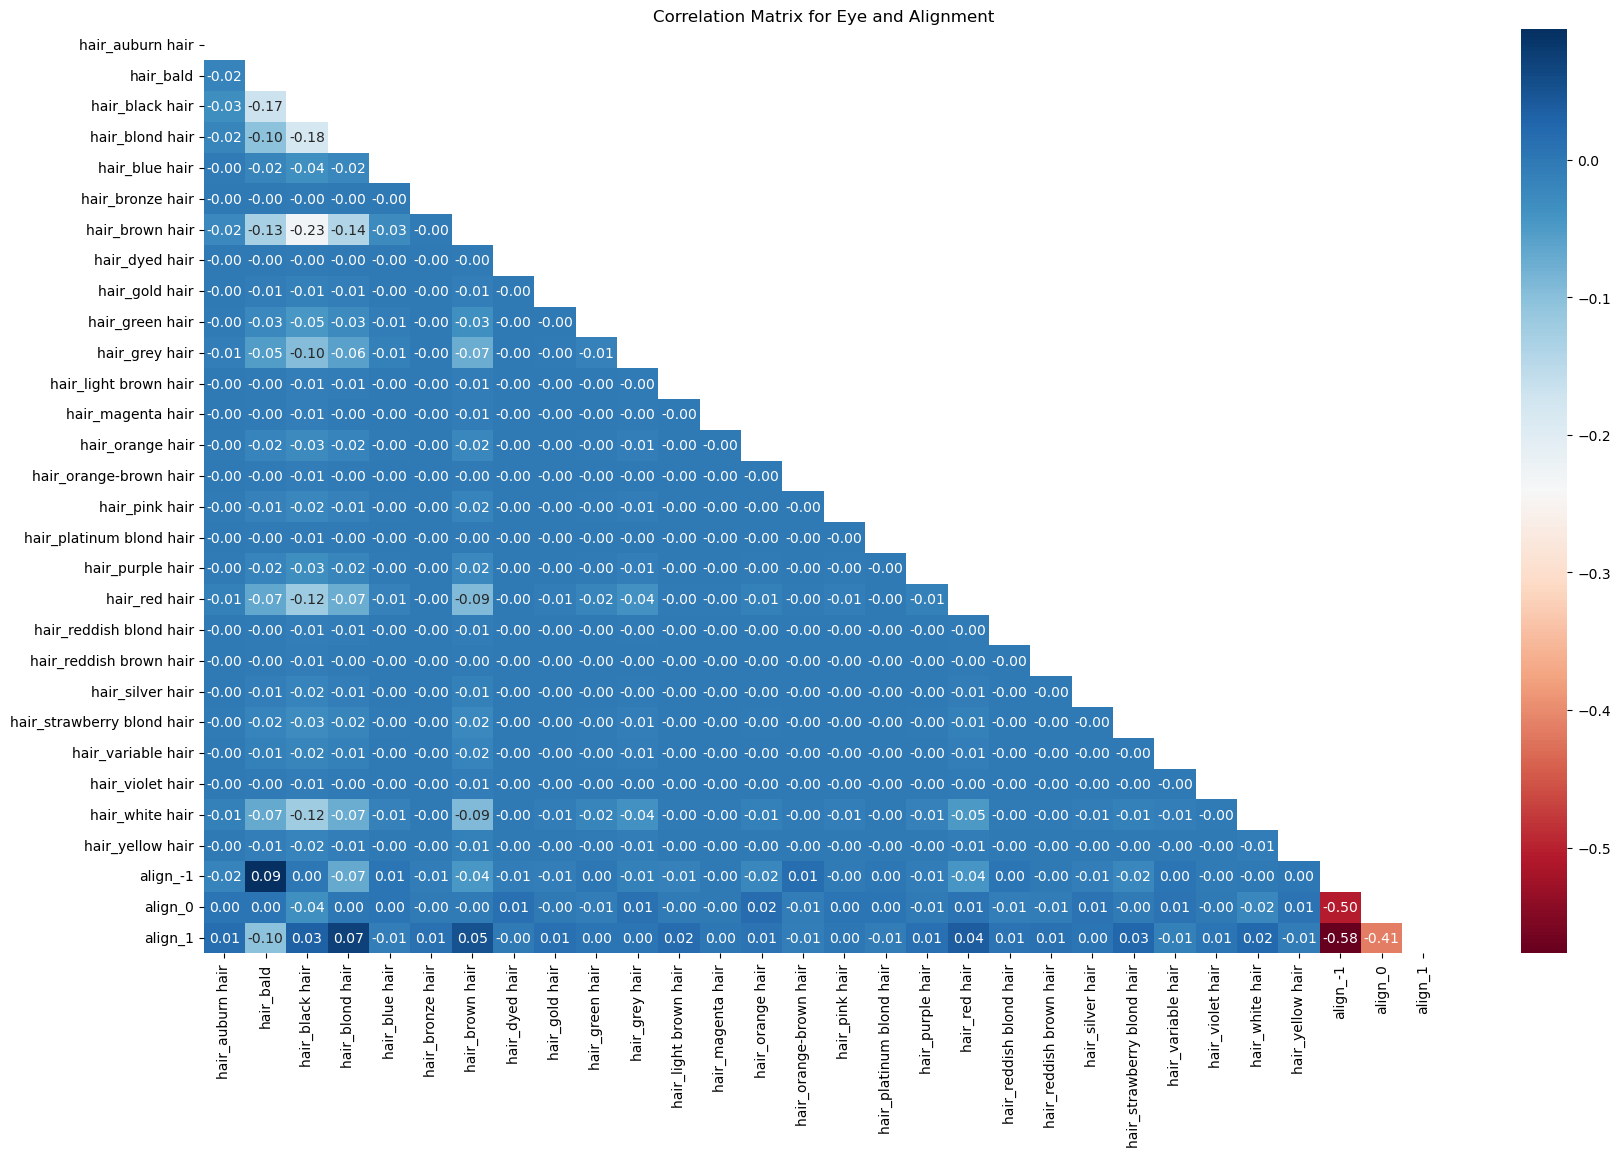

In [50]:
plot_corr_matrix(hair_align_data, "Correlation Matrix for Eye and Alignment")

<span style="color:yellow">
The correlation matrix tells us that there is indeed a slight correlation betewwn bald characters and bad characters. We remember that the bald value was completly missing from the dc characters, so we should check the same correlation matrix for marvel characters only to get a better understanding of this.
Also blond and brown haired characters, tend to be good characters.

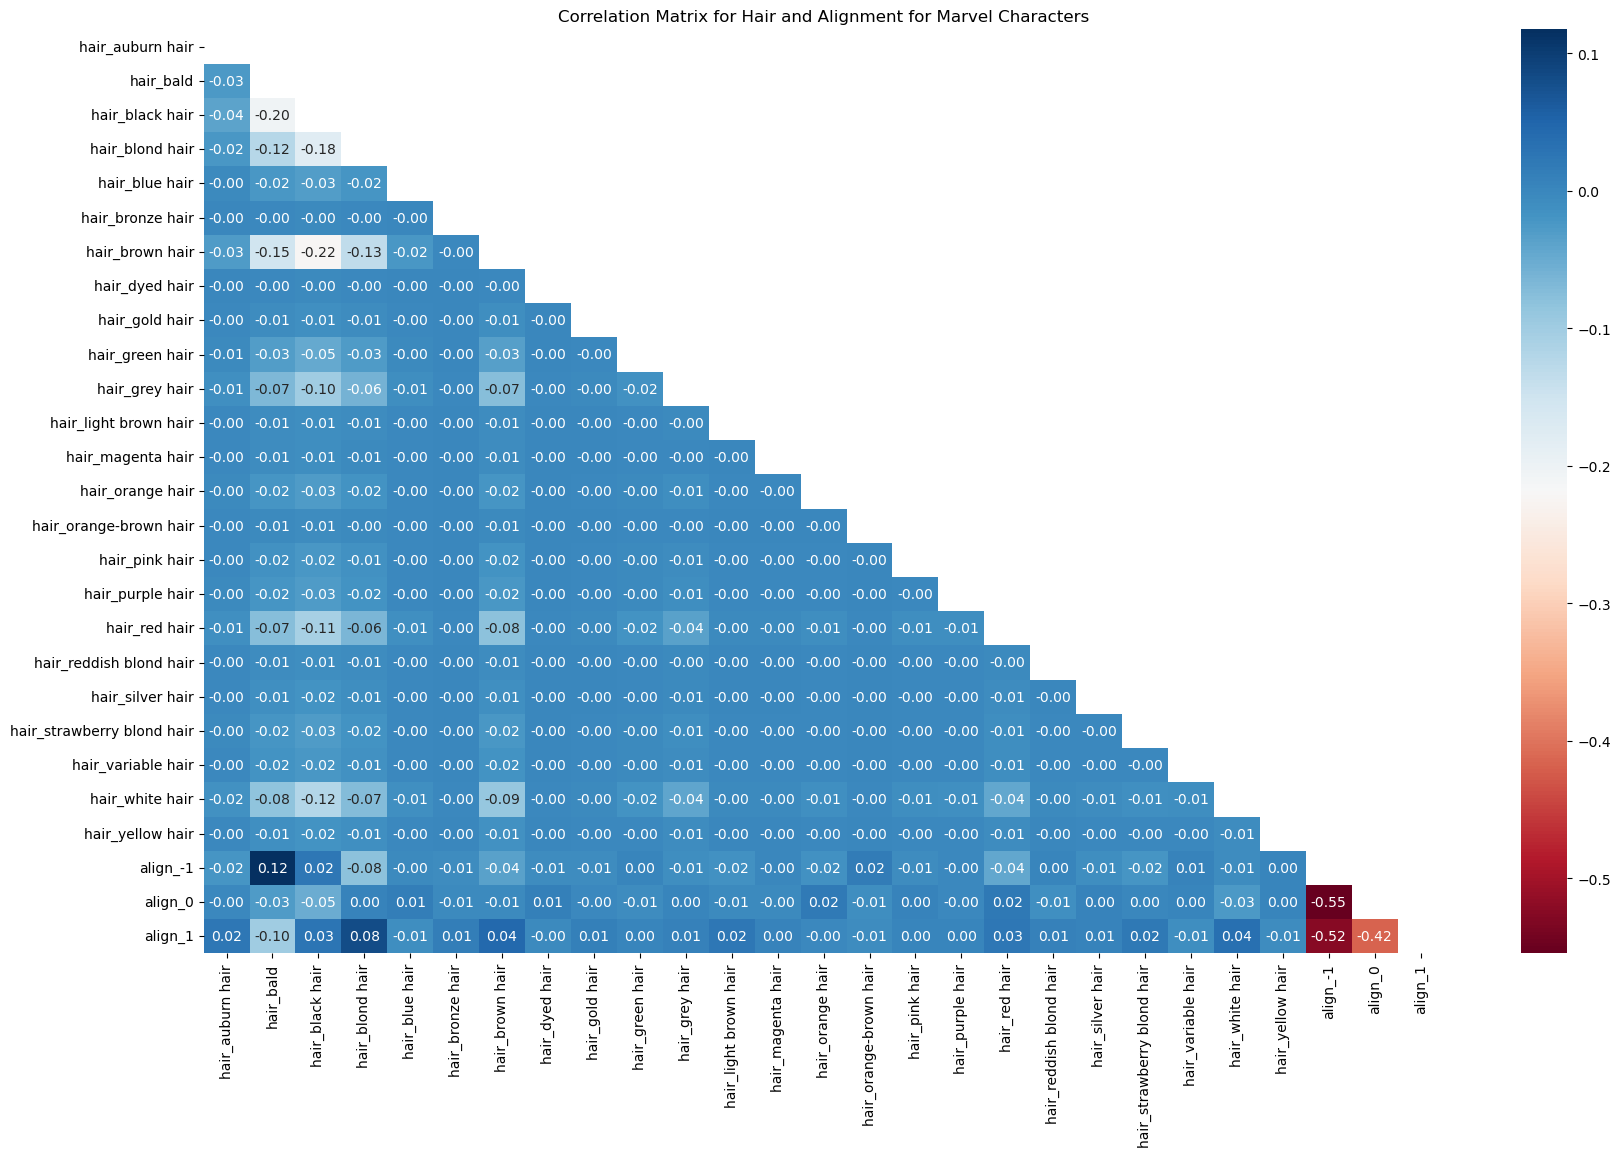

In [51]:
marvel_hair_align_data = data[["hair", "align"]][data.publisher == "marvel"]
marvel_hair_align_data = pd.get_dummies(marvel_hair_align_data, columns=['hair', 'align'])
plot_corr_matrix(marvel_hair_align_data, "Correlation Matrix for Hair and Alignment for Marvel Characters")

<span style="color:yellow">
The bald and bad correlation is indeed stronger for marvel characters. Sadly we don't really know how it is for dc characters as I already explained.

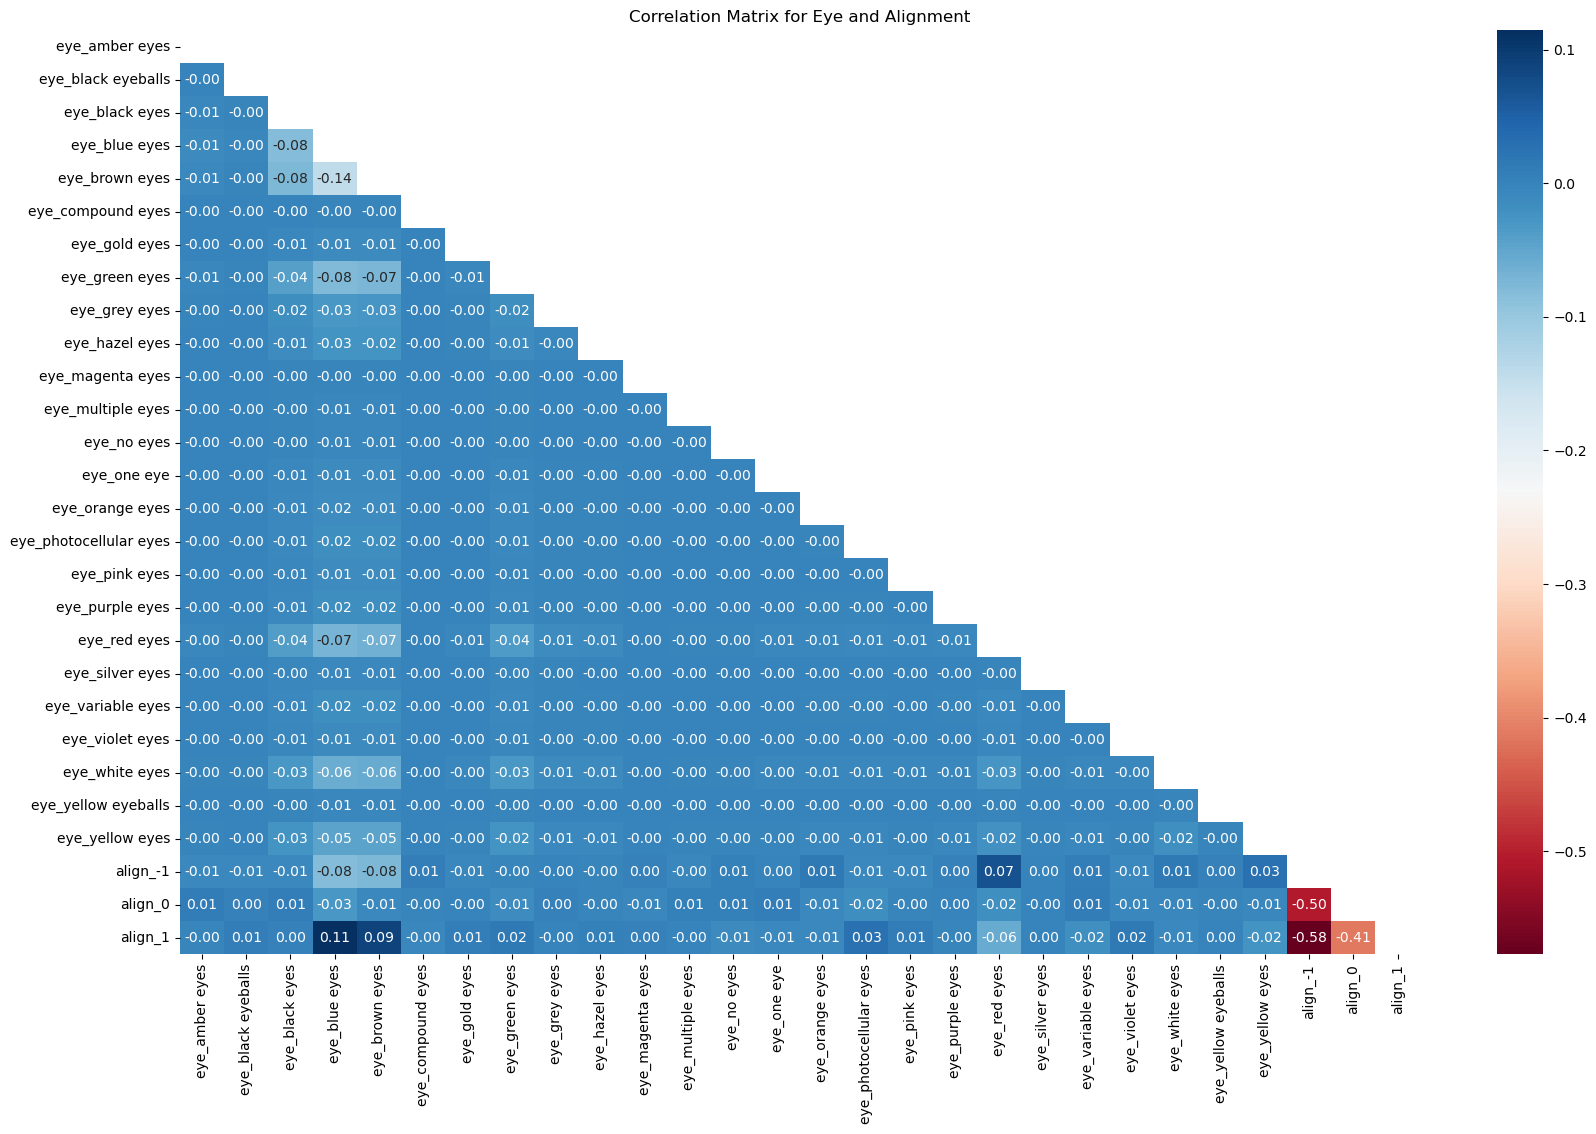

In [52]:
plot_corr_matrix(eye_align_data, "Correlation Matrix for Eye and Alignment")

<span style="color:yellow">
For eye colors we can see, that good characters tend to have blue or brown eyes, while bad characters often have red eyes. 

In [53]:
good_data = data[good_mask].drop(columns=["align", "alive", "appearances", "page_id", "sex", "year"])
bad_data = data[bad_mask].drop(columns=["align", "alive", "appearances", "page_id", "sex", "year"])
good_appearance_data = pd.get_dummies(good_data, columns=['hair', 'eye'])
bad_appearance_data = pd.get_dummies(bad_data, columns=['hair', 'eye'])

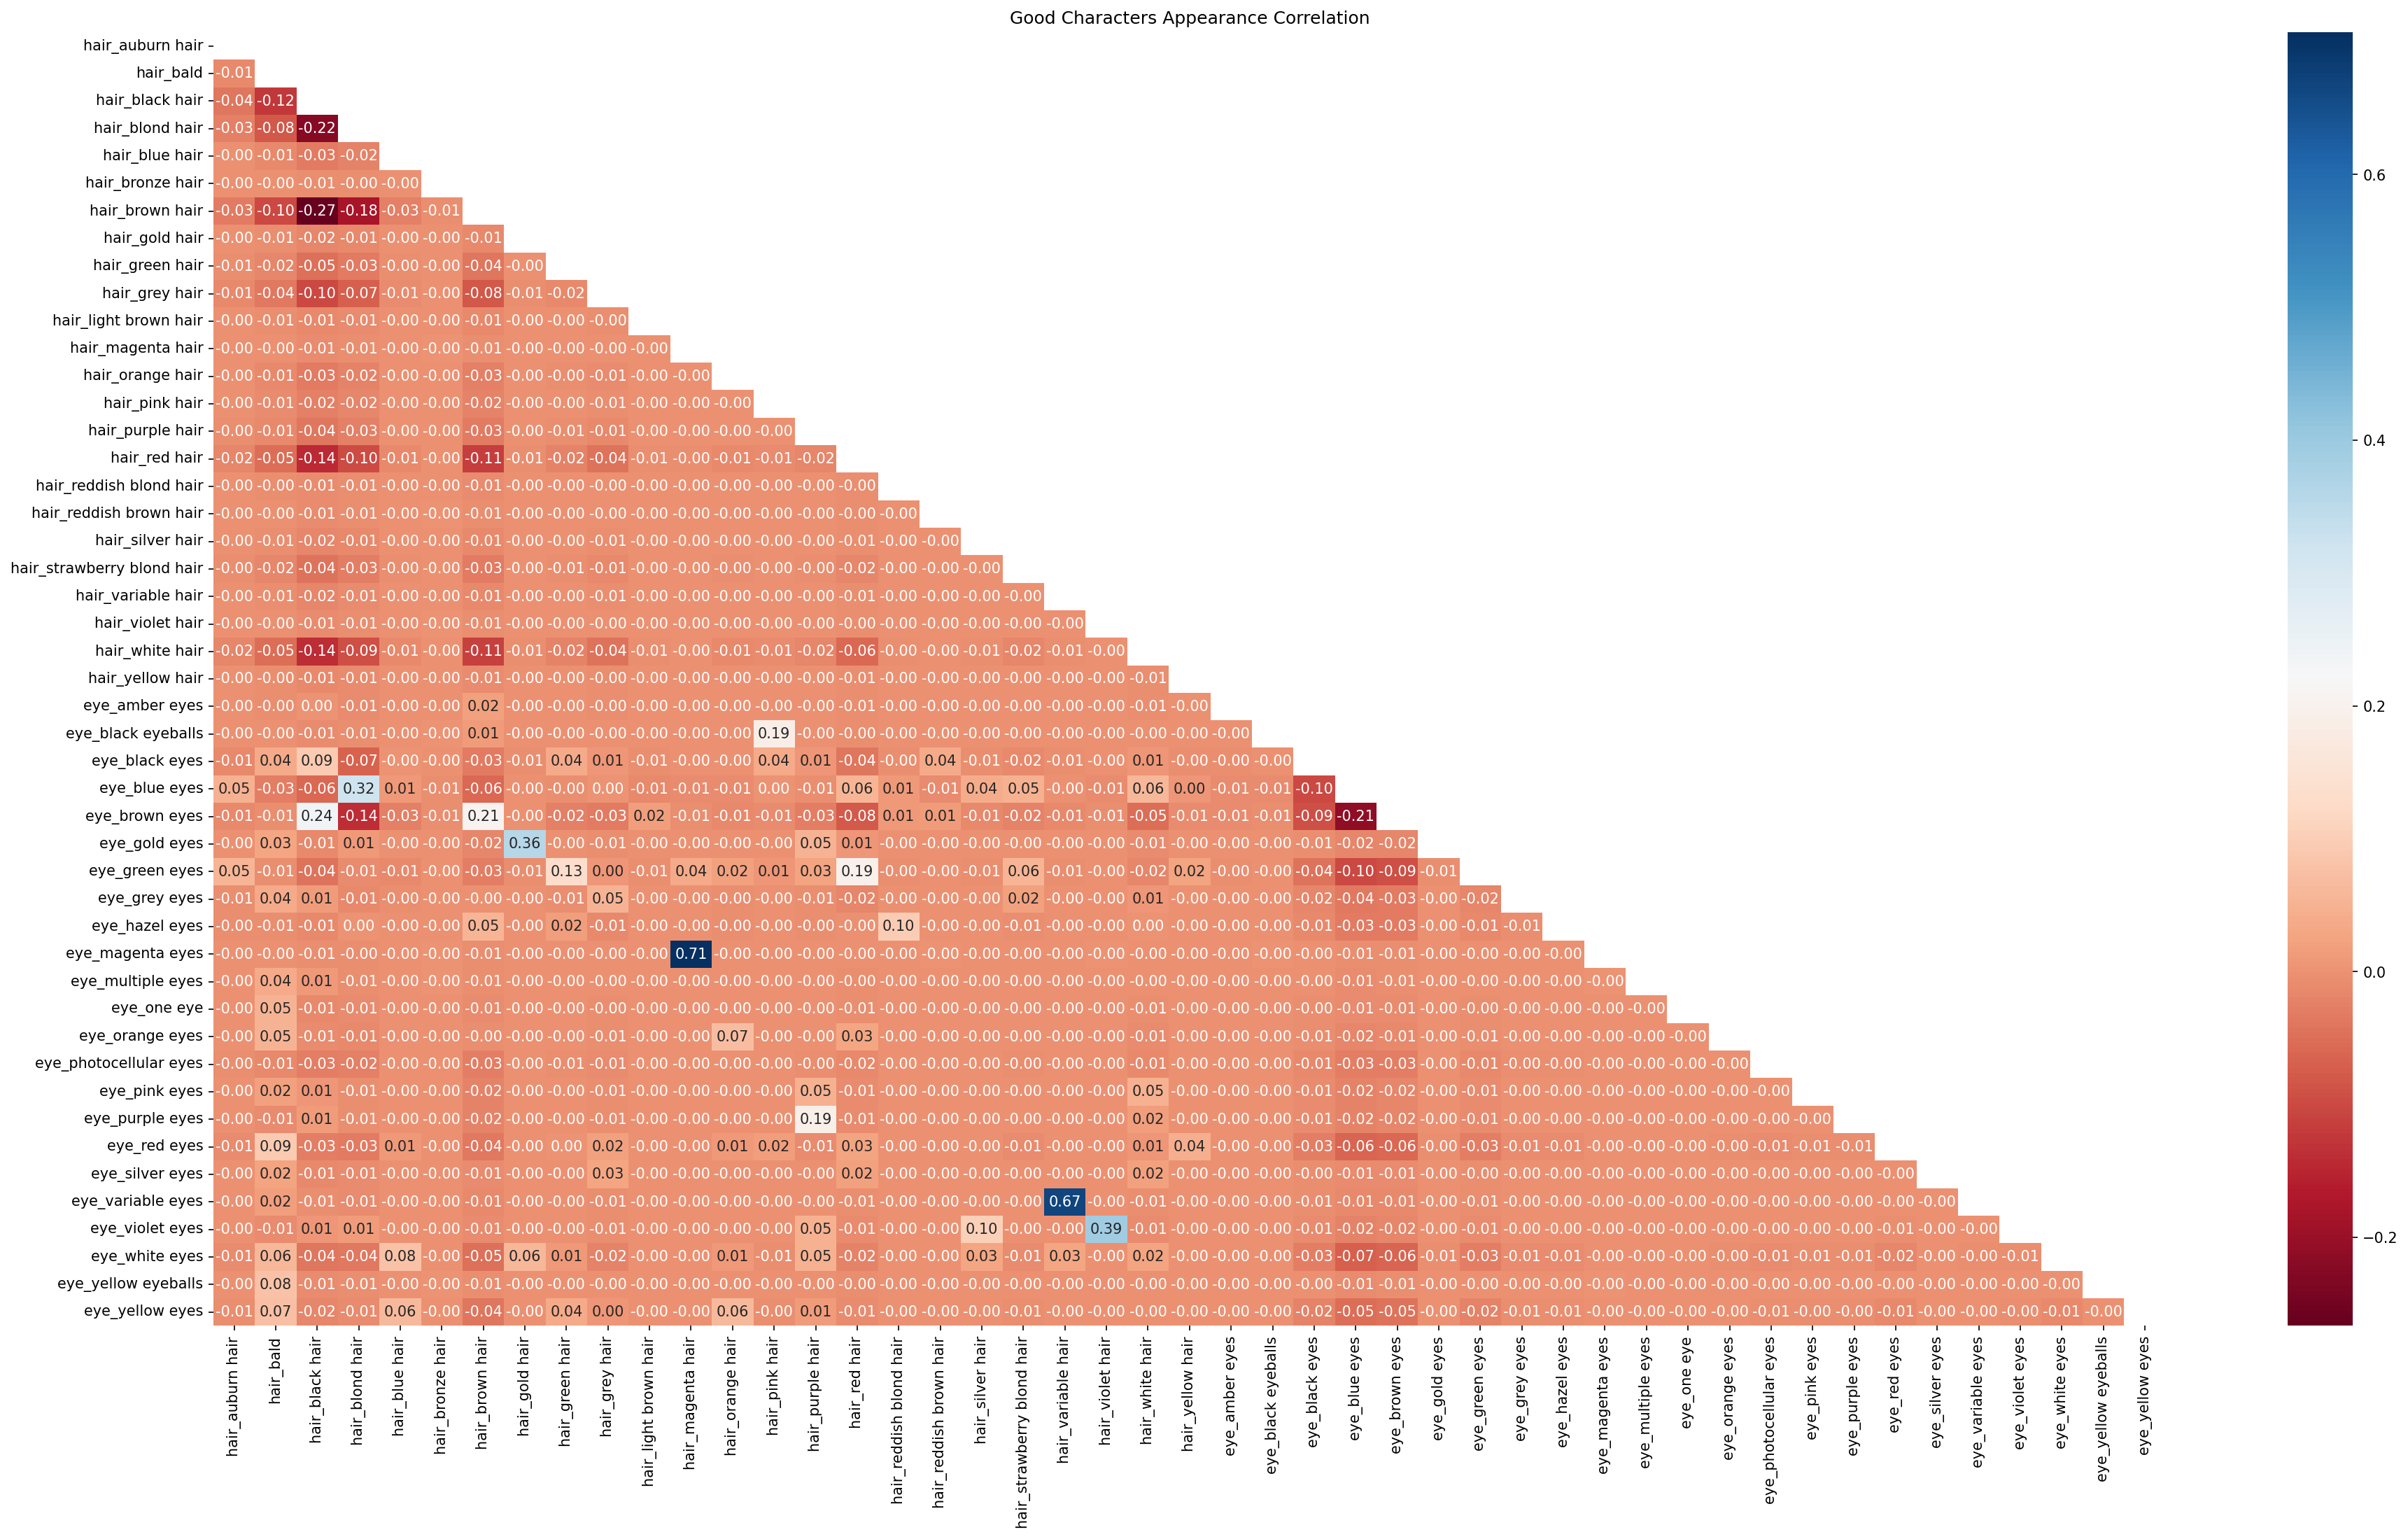

In [54]:
plot_corr_matrix(good_appearance_data, 'Good Characters Appearance Correlation', width=30, height=16, dpi=150)

<span style="color:yellow">
When checking the combined look of hair and eyes on good characters we can see that the highest correlations are actually between hair and eye colors of the same color. This can also be seen for bad characters, so we ignore those. Other than that, the highest correalation is blond hair and blue eyes, followoed by black hair and brown eyes for good characters. Green eyes and red hair is also common, which I find pleasing personally.

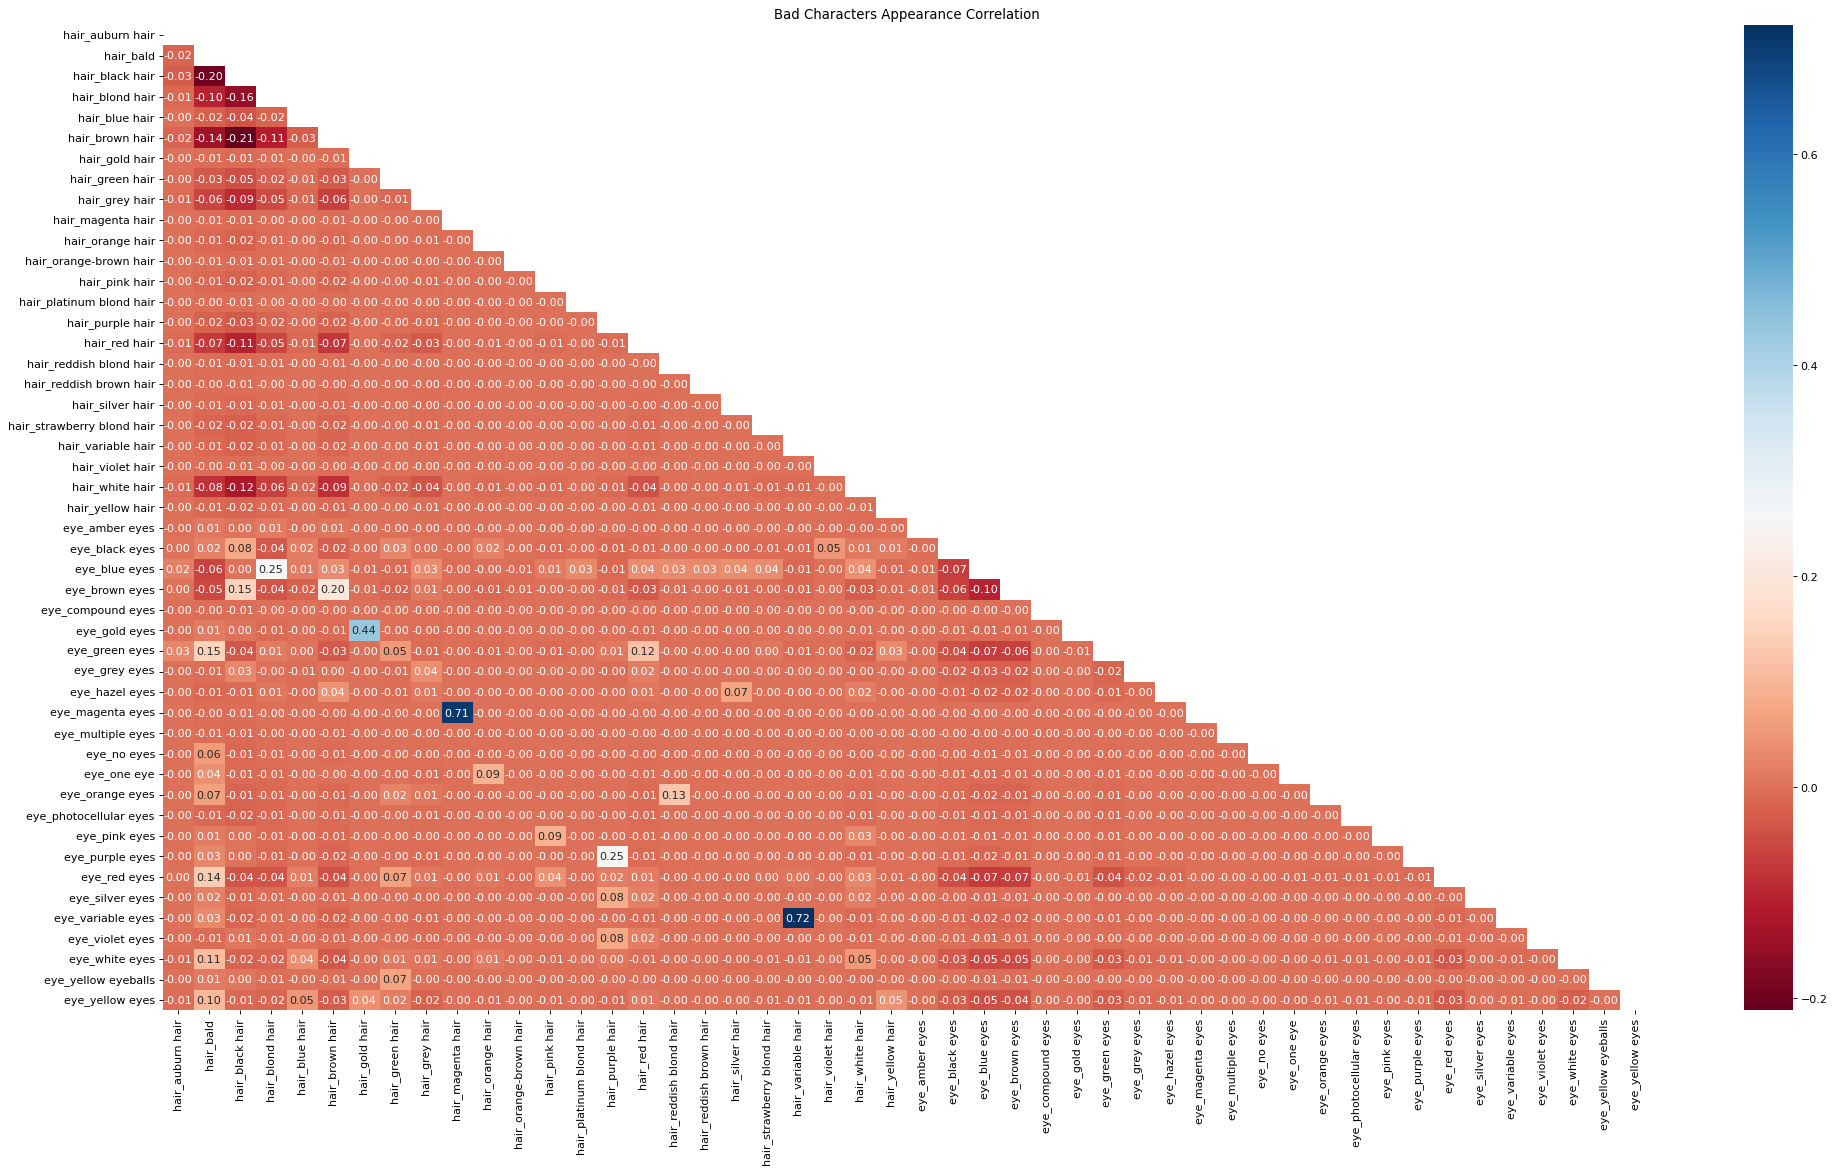

In [55]:
plot_corr_matrix(bad_appearance_data, 'Bad Characters Appearance Correlation', width=30, height=16, dpi=80)

<span style="color:yellow">
For bad characters, the highest correlations besides the uni-colored hair and eyes are actually the same as for good characters. But they are a bit lower. Therefore I would not say that there is a typical combination for good or bad characters.

In [56]:
data[(data.hair == "magenta hair")]# & (data.eye == "magenta eyes")]

,align,alive,appearances,eye,first appearance,gsm,hair,id,name,page_id,sex,urlslug,publisher,year,hero_name,real_name
1294,-1,1,29.0,magenta eyes,1983-09-01,None,magenta hair,secret identity,vixen (british crimelord) (earth-616),15950,1,\/vixen_(british_crimelord)_(earth-616),marvel,1983,vixen,british crimelord
1545,1,1,24.0,green eyes,1994-10-01,None,magenta hair,secret identity,clarice ferguson (earth-616),19280,1,\/clarice_ferguson_(earth-616),marvel,1994,clarice ferguson,earth-616
1729,1,1,21.0,magenta eyes,1981-09-01,None,magenta hair,public identity,fireflyte (earth-616),407243,1,\/fireflyte_(earth-616),marvel,1981,fireflyte,earth-616
7881,0,1,3.0,None,1999-03-01,None,magenta hair,public identity,mendicus (earth-616),45194,-1,\/mendicus_(earth-616),marvel,1999,mendicus,earth-616
9361,-1,1,2.0,None,1992-07-01,None,magenta hair,secret identity,briquette (earth-616),16256,1,\/briquette_(earth-616),marvel,1992,briquette,earth-616


In [57]:
data[(data.eye == "magenta eyes")]# & (data.eye == "magenta eyes")]

,align,alive,appearances,eye,first appearance,gsm,hair,id,name,page_id,sex,urlslug,publisher,year,hero_name,real_name
1294,-1,1,29.0,magenta eyes,1983-09-01,None,magenta hair,secret identity,vixen (british crimelord) (earth-616),15950,1,\/vixen_(british_crimelord)_(earth-616),marvel,1983,vixen,british crimelord
1729,1,1,21.0,magenta eyes,1981-09-01,None,magenta hair,public identity,fireflyte (earth-616),407243,1,\/fireflyte_(earth-616),marvel,1981,fireflyte,earth-616


In [58]:
data[(data.hair == "gold hair") & (data.hair != None)]

,align,alive,appearances,eye,first appearance,gsm,hair,id,name,page_id,sex,urlslug,publisher,year,hero_name,real_name
159,1,1,252.0,white eyes,1967-09-01,None,gold hair,no dual identity,adam warlock (earth-616),1029,-1,\/adam_warlock_(earth-616),marvel,1967,adam warlock,earth-616
2115,1,1,17.0,white eyes,1994-03-01,None,gold hair,secret identity,blitziana (earth-616),256541,1,\/blitziana_(earth-616),marvel,1994,blitziana,earth-616
2210,-1,1,16.0,gold eyes,1985-05-01,None,gold hair,secret identity,gilpetperdon (earth-616),5445,-1,\/gilpetperdon_(earth-616),marvel,1985,gilpetperdon,earth-616
2581,-1,1,13.0,gold eyes,1969-09-01,None,gold hair,secret identity,mordecai midas (earth-616),2703,-1,\/mordecai_midas_(earth-616),marvel,1969,mordecai midas,earth-616
4609,0,1,6.0,None,1980-01-01,None,gold hair,None,aeroika (earth-616),1035,-1,\/aeroika_(earth-616),marvel,1980,aeroika,earth-616
7003,1,1,3.0,brown eyes,1949-10-01,None,gold hair,None,blaze (dog) (earth-616),431996,-1,\/blaze_(dog)_(earth-616),marvel,1949,blaze,dog
7242,0,-1,3.0,gold eyes,1976-02-01,None,gold hair,None,jaard (earth-616),298289,-1,\/jaard_(earth-616),marvel,1976,jaard,earth-616
10962,1,1,1.0,gold eyes,1942-08-01,None,gold hair,secret identity,will power (nowhere) (earth-616),480251,-1,\/will_power_(nowhere)_(earth-616),marvel,1942,will power,nowhere
16725,1,1,85.0,blue eyes,1959-01-01,None,gold hair,public identity,congorilla (new earth),2718,-1,\/wiki\/congorilla_(new_earth),dc,1959,congorilla,new earth
17506,0,1,24.0,gold eyes,1981-06-01,None,gold hair,secret identity,lambien (new earth),81515,-1,\/wiki\/lambien_(new_earth),dc,1981,lambien,new earth


In [59]:
data[(data.eye == "gold eyes") & (data.eye != None)]

,align,alive,appearances,eye,first appearance,gsm,hair,id,name,page_id,sex,urlslug,publisher,year,hero_name,real_name
30,1,1,1007.0,gold eyes,1968-10-01,None,bald,secret identity,vision (earth-616),2414,-1,\/vision_(earth-616),marvel,1968,vision,earth-616
354,1,-1,119.0,gold eyes,2005-08-01,None,bald,public identity,vision (jonas) (earth-616),117089,-1,\/vision_(jonas)_(earth-616),marvel,2005,vision,jonas
933,0,-1,40.0,gold eyes,1978-02-01,None,white hair,no dual identity,araki (earth-616),28858,1,\/araki_(earth-616),marvel,1978,araki,earth-616
1282,-1,1,29.0,gold eyes,1976-12-01,None,bald,secret identity,mastermind (computer) (earth-616),2127,-1,\/mastermind_(computer)_(earth-616),marvel,1976,mastermind,computer
1444,-1,1,26.0,gold eyes,2006-02-01,None,black hair,secret identity,amatsu-mikaboshi (earth-616),128671,-1,\/amatsu-mikaboshi_(earth-616),marvel,2006,amatsu-mikaboshi,earth-616
2210,-1,1,16.0,gold eyes,1985-05-01,None,gold hair,secret identity,gilpetperdon (earth-616),5445,-1,\/gilpetperdon_(earth-616),marvel,1985,gilpetperdon,earth-616
2581,-1,1,13.0,gold eyes,1969-09-01,None,gold hair,secret identity,mordecai midas (earth-616),2703,-1,\/mordecai_midas_(earth-616),marvel,1969,mordecai midas,earth-616
4990,0,1,6.0,gold eyes,2007-01-01,None,black hair,None,oberon (earth-616),35921,-1,\/oberon_(earth-616),marvel,2007,oberon,earth-616
5523,1,1,5.0,gold eyes,1996-12-01,None,black hair,secret identity,sinjin quarrel (earth-616),35890,-1,\/sinjin_quarrel_(earth-616),marvel,1996,sinjin quarrel,earth-616
6659,-1,-1,4.0,gold eyes,2004-08-01,None,bald,public identity,fury (earth-616),591475,0,\/fury_(earth-616),marvel,2004,fury,earth-616


<span style="color:yellow">
Also the very high correlations in the correlation matrix are for combinations that show up rarely in the data. So if a bad character has magenta hair, t is very likely that they have magenta eyes. Because there is only one character, who fits this description, called Vixen. For good characters that is fireflyte.